# Preliminary Data Exploration

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

In [5]:
print(df_yearly.shape)
print(df_monthly.shape)

(12, 4)
(98, 3)


In [6]:
print(df_yearly.columns)
print(df_monthly.columns)

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Index(['date', 'births', 'deaths'], dtype='object')


### Check for NaN Values and Duplicates

In [7]:
print(df_yearly.isna().values.any())
print(df_yearly.duplicated().values.any())

False
False


In [8]:
print(df_monthly.isna().values.any())
print(df_monthly.duplicated().values.any())

False
False


### Descriptive Statistics

In [9]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


In [10]:
df_yearly.head(12)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [11]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [12]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


### Percentage of Women Dying in Childbirth

In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013. [[source]](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [13]:
print(f'{round(df_yearly.deaths.sum() / df_yearly.births.sum() * 100, 2)}%')

7.08%


# Visualize the Total Number of Births and Deaths Over Time

### Plot the Monthly Data on Twin Axes

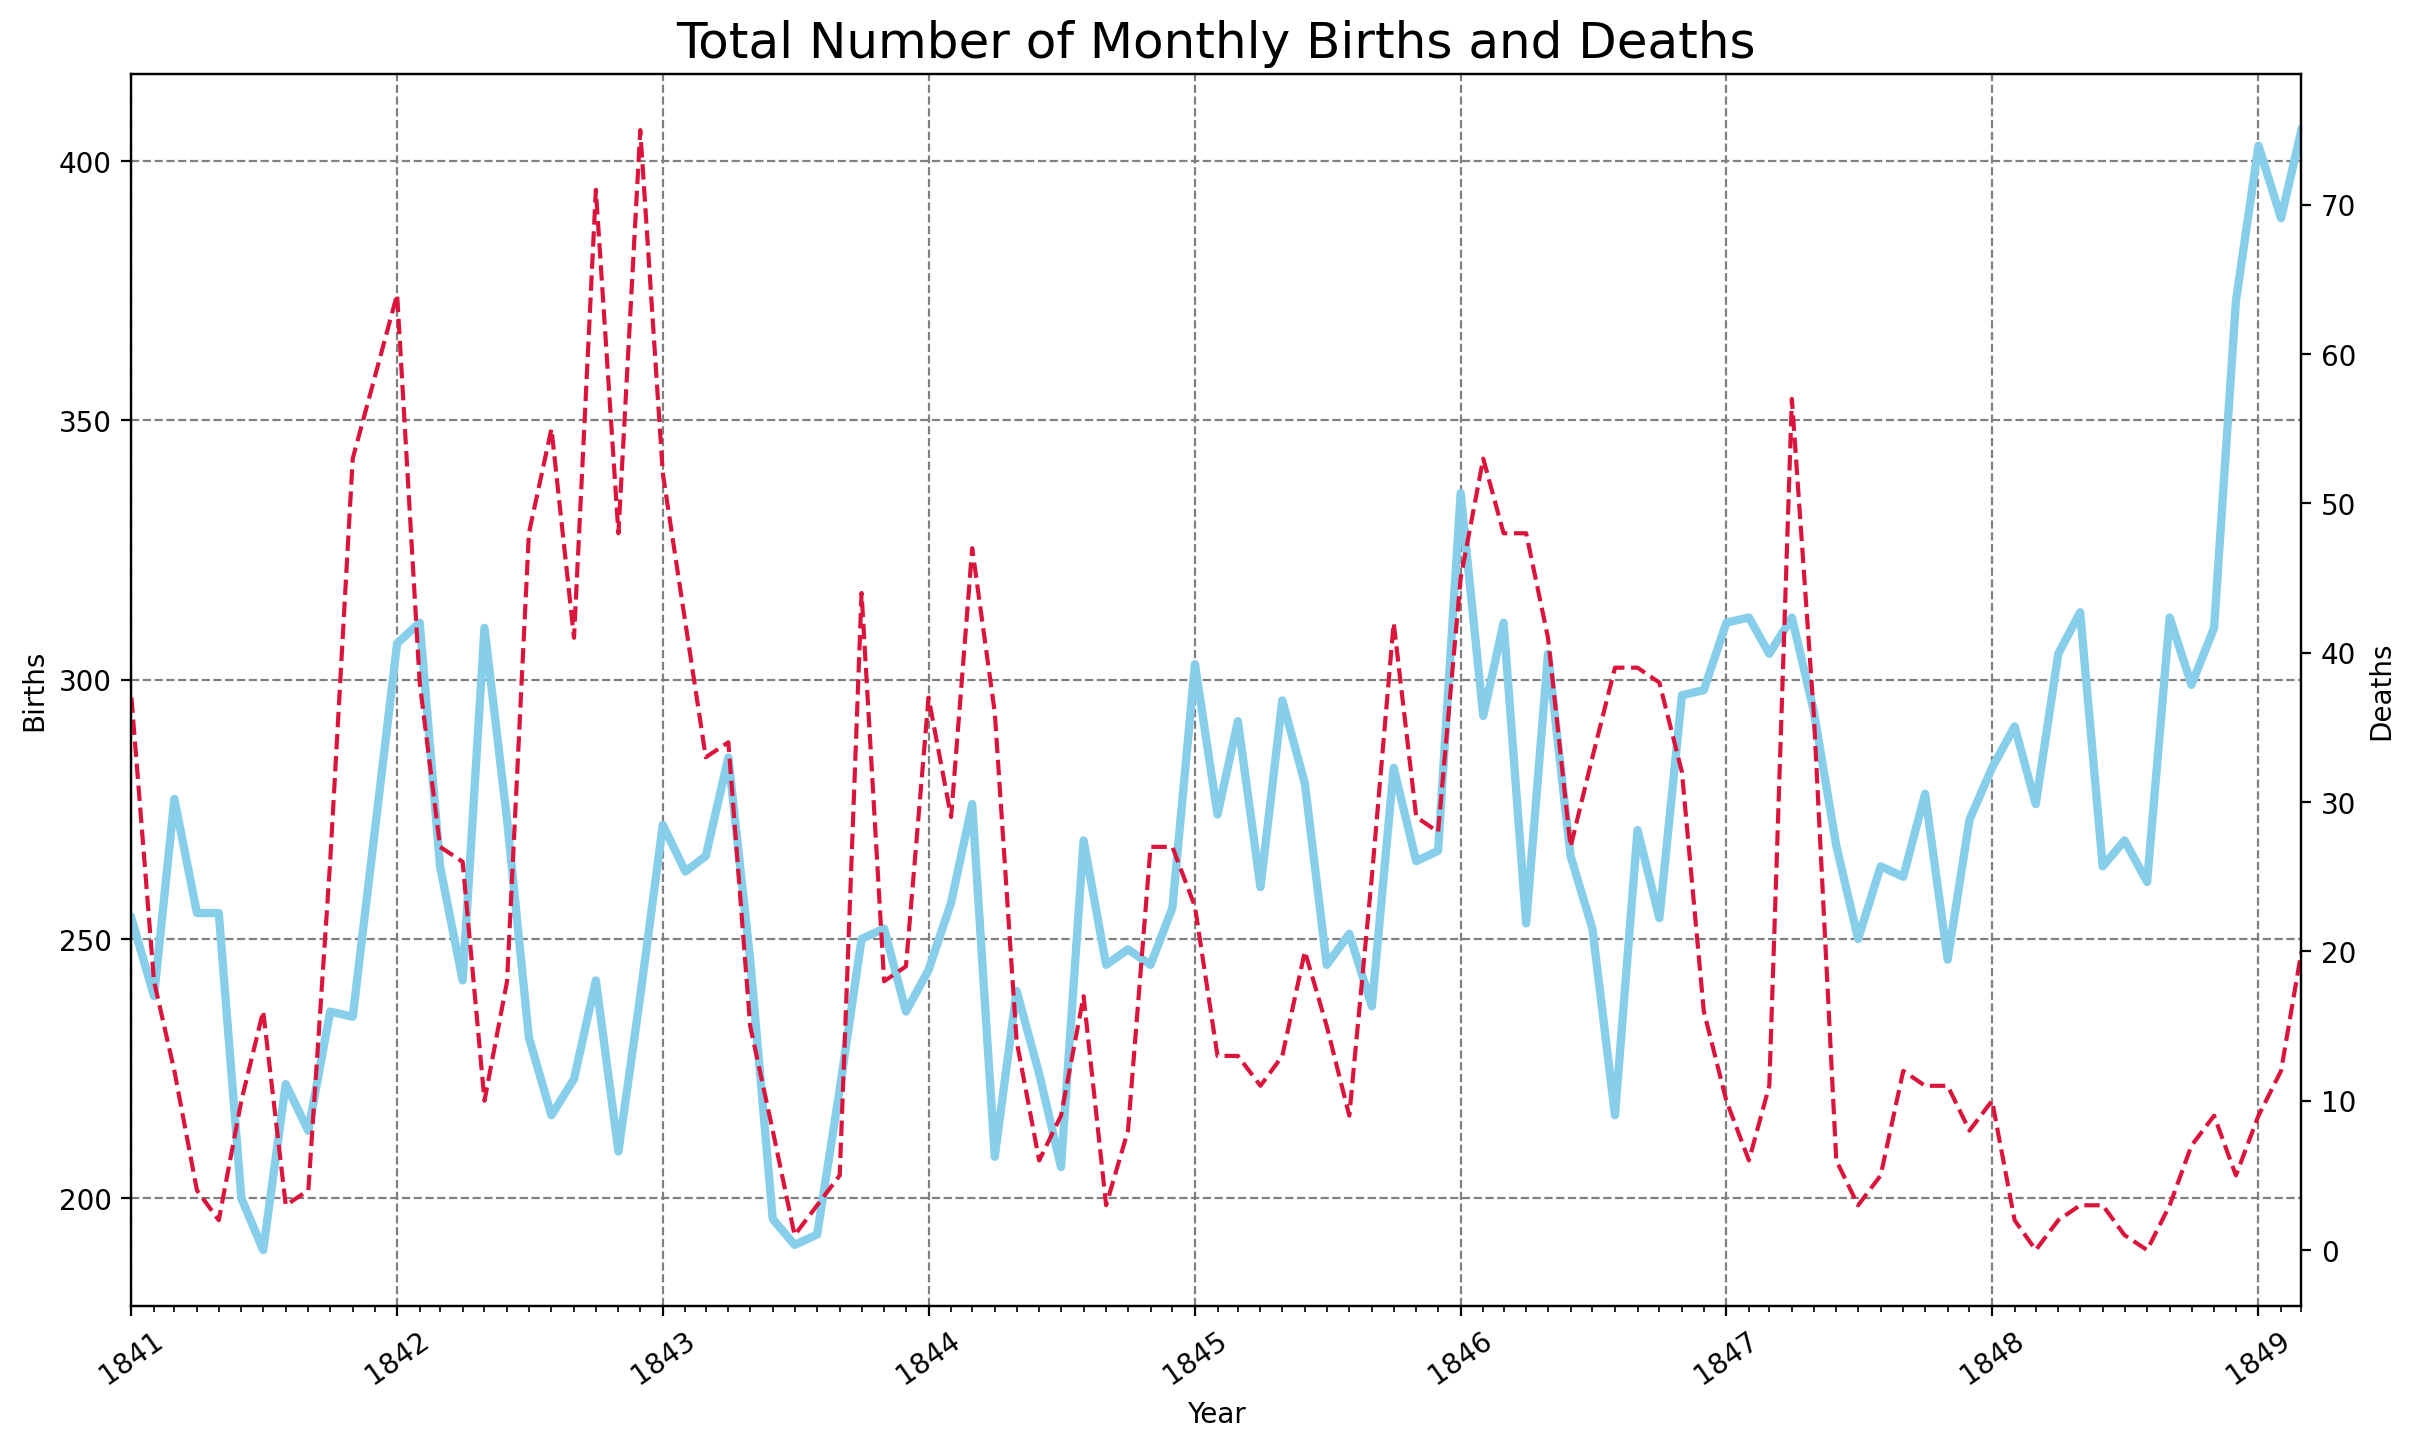

In [14]:
plt.figure(figsize=(14, 8),
           dpi=200)
plt.xticks(rotation=35)

ax = plt.gca()
ax2 = ax.twinx()

ax.plot(df_monthly.date,
        df_monthly.births,
        'skyblue',
        linewidth=3.0,
        label='Births')

ax2.plot(df_monthly.date,
        df_monthly.deaths,
        'crimson',
        linestyle='dashed',
        label='Deaths')

ax.grid(color='grey', linestyle='--')
ax.set_xlabel('Year')
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
ax.set_ylabel('Births')
ax2.set_ylabel('Deaths')
ax.set_title('Total Number of Monthly Births and Deaths', fontsize=18)

years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

plt.show()

# The Yearly Data Split by Clinic

In [15]:
df_yearly.head(1)

,year,births,deaths,clinic
0,1841,3036,237,clinic 1


In [16]:
line = px.line(df_yearly,
               x='year',
               y='births',
               color='clinic',
               title='Total Yearly Births per Clinic')

line.show()

In [17]:
line = px.line(df_yearly,
               x='year',
               y='deaths',
               color='clinic',
               title='Total Yearly Deaths per Clinic')

line.show()

### Calculate the Proportion of Deaths at Each Clinic

In [18]:
df_yearly['pct_deaths'] = round(df_yearly.deaths / df_yearly.births * 100, 2)

In [20]:
df_clinic = df_yearly.groupby(['clinic'], as_index=False).agg({'births': pd.Series.sum,
                                                   'deaths': pd.Series.sum})

In [21]:
df_clinic['death_rate'] = round(df_clinic.deaths / df_clinic.births * 100, 2)

In [22]:
df_clinic.head()

,clinic,births,deaths,death_rate
0,clinic 1,20042,1989,9.92
1,clinic 2,17791,691,3.88


### Plotting the Proportion of Yearly Deaths by Clinic

In [23]:
line2 = px.line(df_yearly,
                x='year',
                y='pct_deaths',
                color='clinic',
                title='Proportion of Yearly Deaths per Clinic')

line2.show()

# The Effect of Handwashing

In [24]:
handwashing_start = pd.to_datetime('1847-06-01')

In [29]:
df_monthly['pct_deaths'] = round((df_monthly.deaths / df_monthly.births) * 100, 2)

In [31]:
df_before = df_monthly[df_monthly.date < handwashing_start]

In [48]:
avg_deaths_before = round(df_before.pct_deaths.mean(), 2)

print(f"The average death rate before 1847: {avg_deaths_before}%")

The average death rate before 1847: 10.5%


In [42]:
df_after = df_monthly[df_monthly.date >= handwashing_start]

In [49]:
avg_deaths_after = round(df_after.pct_deaths.mean(), 2)

print(f"The average death rate after 1847: {avg_deaths_after}%")

The average death rate after 1847: 2.11%


### Calculate a Rolling Average of the Death Rate

In [44]:
df_monthly.head()

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78


In [50]:
rolling_deaths_df = df_before.set_index('date')

In [51]:
rolling_deaths_df = rolling_deaths_df.rolling(window=6).mean()

### Highlighting Subsections of a Line Chart

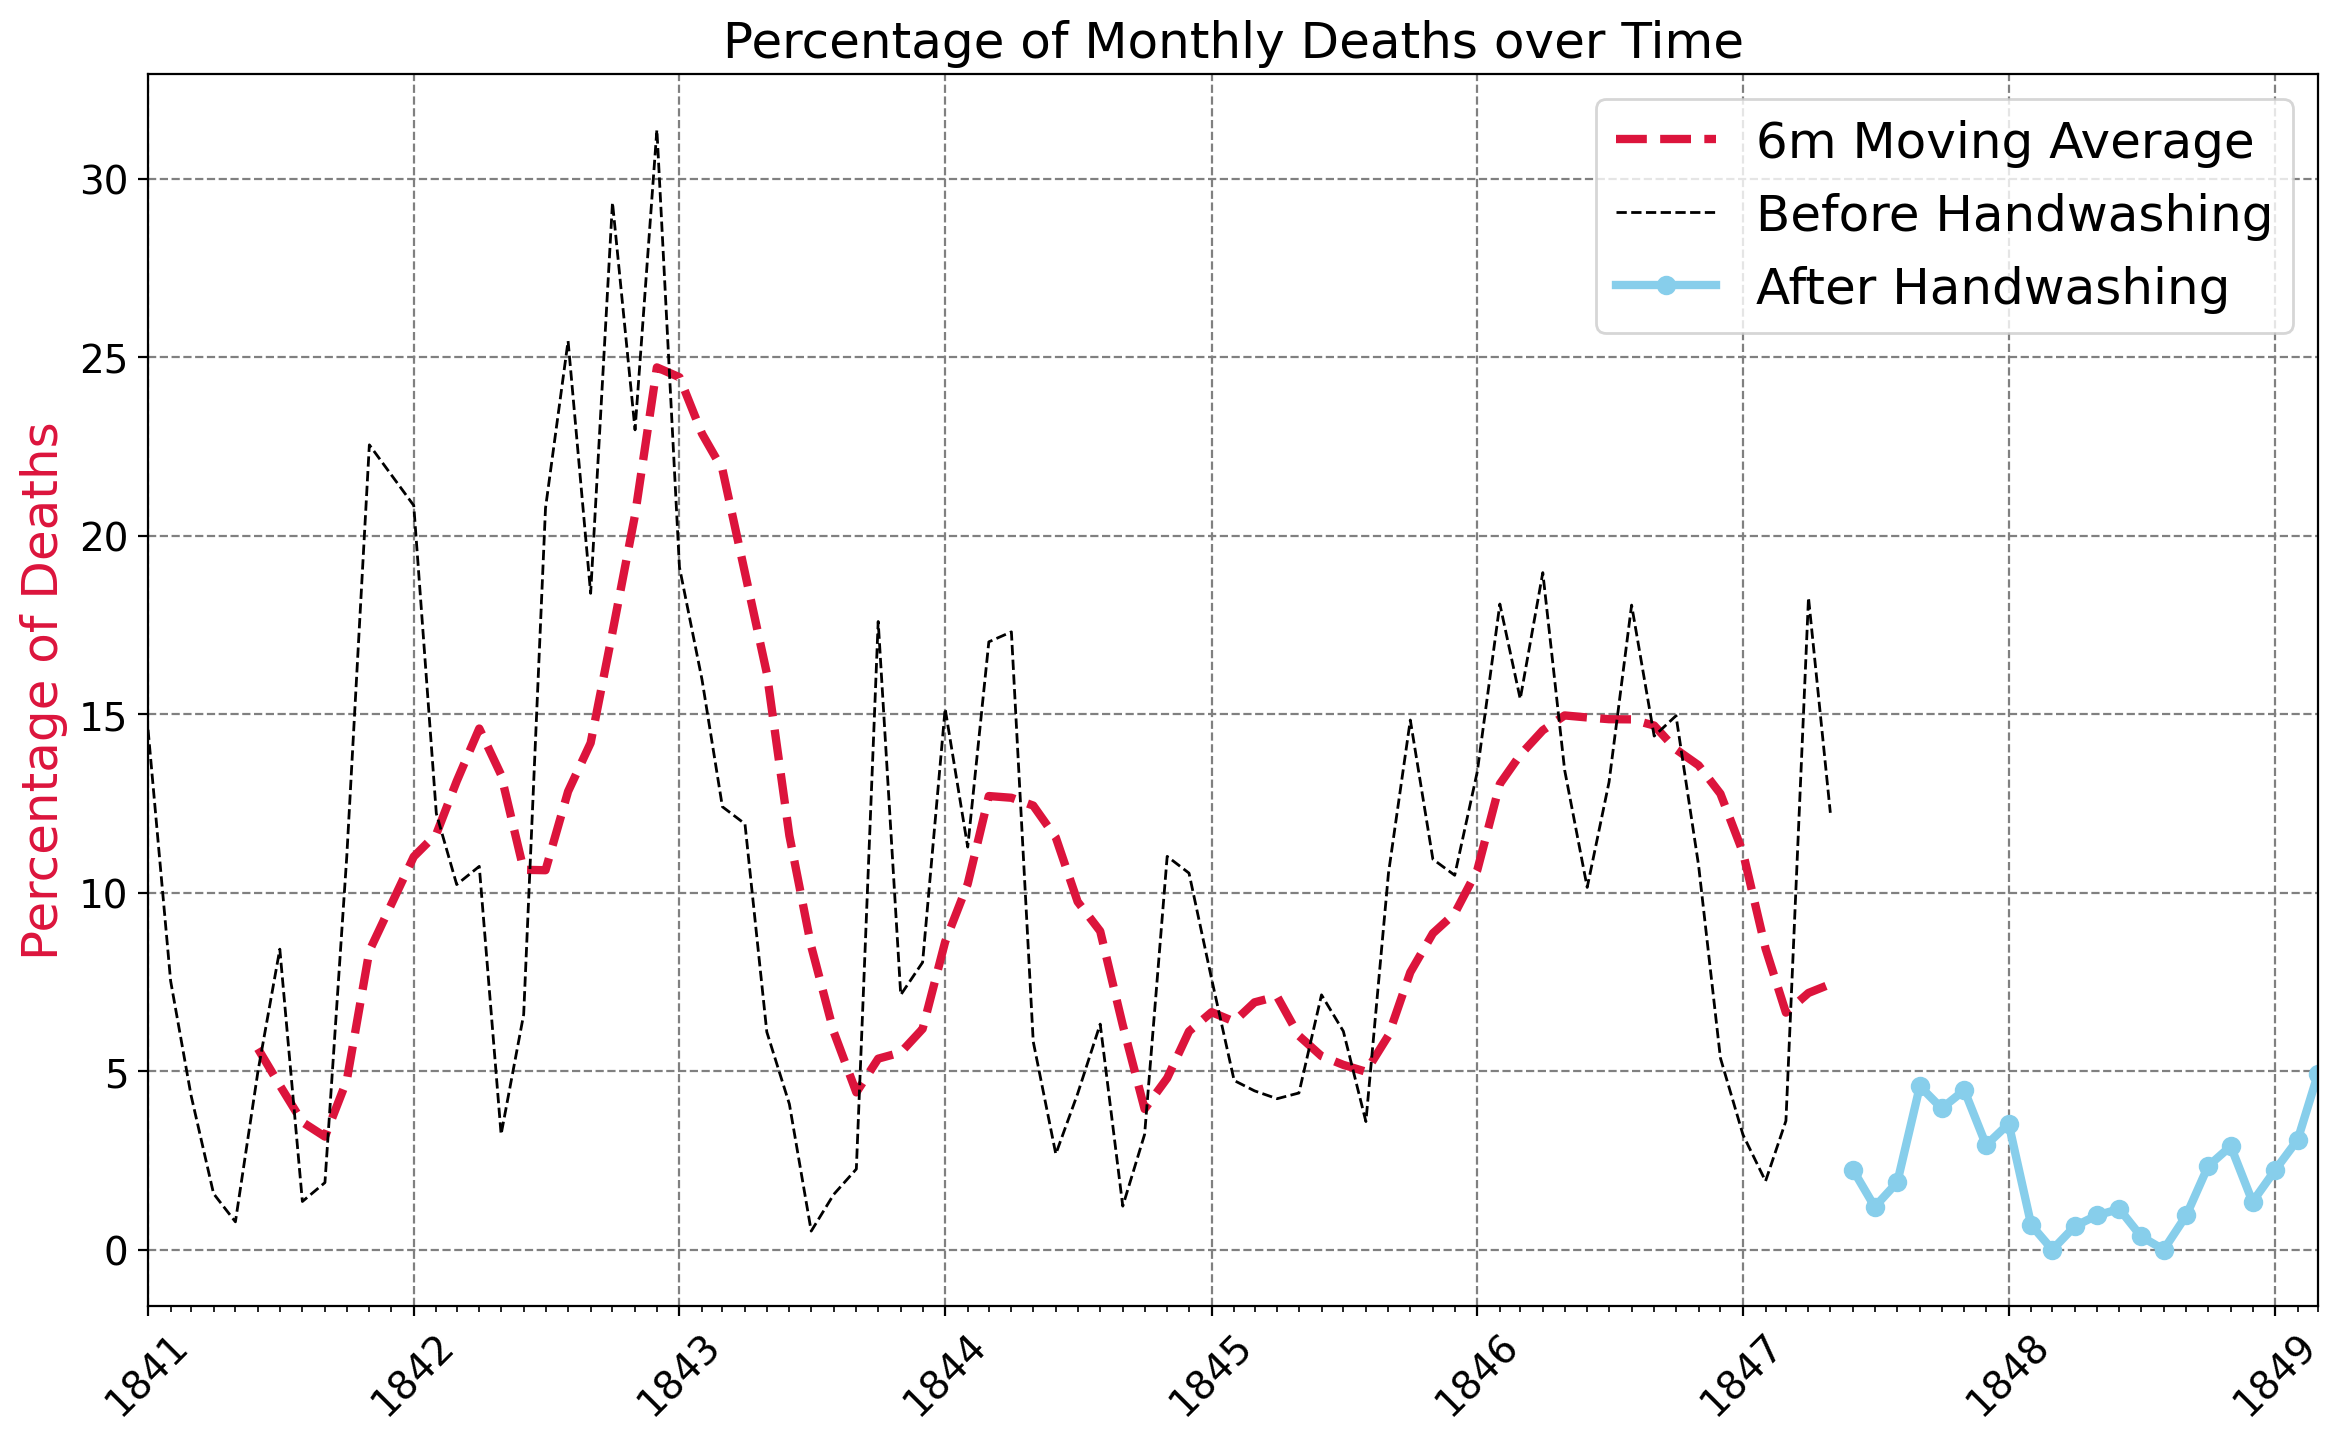

In [61]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Monthly Deaths over Time', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
plt.ylabel('Percentage of Deaths', color='crimson', fontsize=18)
 
ax = plt.gca()
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
ax.set_xlim([df_monthly.date.min(), df_monthly.date.max()])
 
plt.grid(color='grey', linestyle='--')
 
ma_line, = plt.plot(rolling_deaths_df.index, 
                    rolling_deaths_df.pct_deaths, 
                    color='crimson', 
                    linewidth=3, 
                    linestyle='--',
                    label='6m Moving Average')
bw_line, = plt.plot(df_before.date, 
                    df_before.pct_deaths,
                    color='black', 
                    linewidth=1, 
                    linestyle='--', 
                    label='Before Handwashing')
aw_line, = plt.plot(df_after.date, 
                    df_after.pct_deaths, 
                    color='skyblue', 
                    linewidth=3, 
                    marker='o',
                    label='After Handwashing')
 
plt.legend(handles=[ma_line, bw_line, aw_line],
           fontsize=18)
 
plt.show()

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

In [62]:
df_monthly['washing_hands'] = np.where(df_monthly.date < handwashing_start, 'No', 'Yes')

In [63]:
box = px.box(df_monthly,
             x='washing_hands',
             y='pct_deaths',
             color='washing_hands',
             title='How Have the Stats Changed with Handwashing?')

box.update_layout(xaxis_title='Washing Hands?',
                  yaxis_title='Percentage of Monthly Deaths')

box.show()

### Use Histograms to Visualize the Monthly Distribution of Outcomes

In [64]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='washing_hands',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

### Use a T-Test to Show Statistical Significance

In [67]:
import scipy.stats as stats

In [68]:
t_stat, p_val = stats.ttest_ind(a=df_before.pct_deaths,
                                b=df_after.pct_deaths)

In [72]:
print(f"T-statistic: {round(t_stat, 2)}")
print(f"P-value: {round(p_val, 2)}001\n")

print("The difference is statistically significant.")

T-statistic: 5.51
P-value: 0.0001

The difference is statistically significant.
